### 0. Imports, Formatters and Constants

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import ipywidgets as widgets
import sys; sys.path.insert(0, '..')
import packages.formatter as fmt
fmt.init_formatters()

In [3]:
N_MAX = 100
CONST = [0.1, 1, 5]

### 1. Canonical Density Operator

The number operator $\hat{n} = \hat{a}^\dagger\hat{a} = \sum_n n|n\rangle\langle n|$ is

In [4]:
n = np.diag([i for i in range(N_MAX + 1)])
n

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   1,   0, ...,   0,   0,   0],
       [  0,   0,   2, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  98,   0,   0],
       [  0,   0,   0, ...,   0,  99,   0],
       [  0,   0,   0, ...,   0,   0, 100]])

In [5]:
def calc_rho_k(c: float) -> np.ndarray:
    exp = np.exp(-n / c)
    Z = np.trace(exp)
    return exp / Z

For different constants $c \equiv \frac{k_\text{B}T}{\hbar\omega}$ we get the density matrices $\hat{\rho}_\text{K}$ with traces $Sp\{\hat{\rho}_\text{K}\}$ and mean occupation numbers $\langle\hat{n}\rangle$.

In [6]:
w = widgets.Dropdown(
    options=CONST,
    value=CONST[0],
    description='c = ',
    disabled=False,
)
rho_k = widgets.Output()
trace_k = widgets.Output()
expectation_k = widgets.Output()


def update(change):
    r = calc_rho_k(change['new'])
    tr = np.trace(r)
    exp = np.trace(n @ r)

    with rho_k:
        rho_k.clear_output()
        display(r)
    
    with trace_k:
        trace_k.clear_output()
        display(tr)

    with expectation_k:
        expectation_k.clear_output()
        display(exp)

update({'new': w.value})
w.observe(update, names='value')
display(w)

Dropdown(description='c = ', options=(0.1, 1, 5), value=0.1)

In [7]:
display(rho_k)

Output()

In [8]:
display(trace_k)

Output()

In [9]:
display(expectation_k)

Output()

### 2. Coherent Density Operator

In [10]:
def calc_rho_c(alpha_square: float) -> np.ndarray:
    vec = np.array([np.sqrt(alpha_square**i / math.factorial(i)) for i in range(N_MAX + 1)])
    return np.exp(-alpha_square) * np.outer(vec, vec)

For different constants $|\alpha|^2$ we get the density matrices $\hat{\rho}_\text{c}$ with traces $Sp\{\hat{\rho}_\text{c}\}$, purity $R = Sp\{\hat{\rho}_\text{c}^2\}$ and mean occupation numbers $\langle\hat{n}\rangle$.

In [14]:
w_c = widgets.Dropdown(
    options=CONST,
    value=CONST[0],
    disabled=False,
)
label = widgets.HTML(value=r"$|\alpha|^2 = $")
rho_c = widgets.Output()
trace_c = widgets.Output()
purity_c = widgets.Output()
expectation_c = widgets.Output()

def update(change):
    r = calc_rho_c(change['new'])
    tr = np.trace(r)
    pu = np.trace(r @ r)
    exp = np.trace(n @ r)

    with rho_c:
        rho_c.clear_output()
        display(r)
    
    with trace_c:
        trace_c.clear_output()
        display(tr)

    with purity_c:
        purity_c.clear_output()
        display(pu)

    with expectation_c:
        expectation_c.clear_output()
        display(exp)

update({'new': w_c.value})
w_c.observe(update, names='value')
display(widgets.HBox([label, w_c]))

In [ ]:
display(rho_c)

Output()

In [ ]:
display(trace_c)

Output()

In [ ]:
display(purity_c)

Output()

In [ ]:
display(expectation_c)

Output()

### 3. Occupation probabilities

From the relation between the mean occupation number and the constants we get 
$$c = \frac{k_\text{B}T}{\hbar\omega} = \frac{1}{\ln\left(\frac{1}{\langle\hat{n}\rangle} + 1\right)} = \frac{1}{\ln\left(\frac{4}{3}\right)}$$
and $$|\alpha|^2 = \langle\hat{n}\rangle = 3\,.$$

In [ ]:
rho_K = calc_rho_k(1 / np.log(4 / 3))
rho_K

array([[2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
        2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
       [2.50000000e-01, 1.87500000e-01, 2.50000000e-01, ...,
        2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
       [2.50000000e-01, 2.50000000e-01, 1.40625000e-01, ...,
        2.50000000e-01, 2.50000000e-01, 2.50000000e-01],
       ...,
       [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
        1.42542319e-13, 2.50000000e-01, 2.50000000e-01],
       [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
        2.50000000e-01, 1.06906740e-13, 2.50000000e-01],
       [2.50000000e-01, 2.50000000e-01, 2.50000000e-01, ...,
        2.50000000e-01, 2.50000000e-01, 8.01800546e-14]])

In [ ]:
rho_C = calc_rho_c(3)
rho_C

array([[4.97870684e-002, 8.62337320e-002, 1.05614321e-001, ...,
        1.22708262e-055, 2.13607666e-056, 3.69979331e-057],
       [8.62337320e-002, 1.49361205e-001, 1.82929370e-001, ...,
        2.12536945e-055, 3.69979331e-056, 6.40822999e-057],
       [1.05614321e-001, 1.82929370e-001, 2.24041808e-001, ...,
        2.60303533e-055, 4.53130288e-056, 7.84844682e-057],
       ...,
       [1.22708262e-055, 2.12536945e-055, 2.60303533e-055, ...,
        3.02434309e-109, 5.26470555e-110, 9.11873750e-111],
       [2.13607666e-056, 3.69979331e-056, 4.53130288e-056, ...,
        5.26470555e-110, 9.16467602e-111, 1.58736845e-111],
       [3.69979331e-057, 6.40822999e-057, 7.84844682e-057, ...,
        9.11873750e-111, 1.58736845e-111, 2.74940281e-112]])

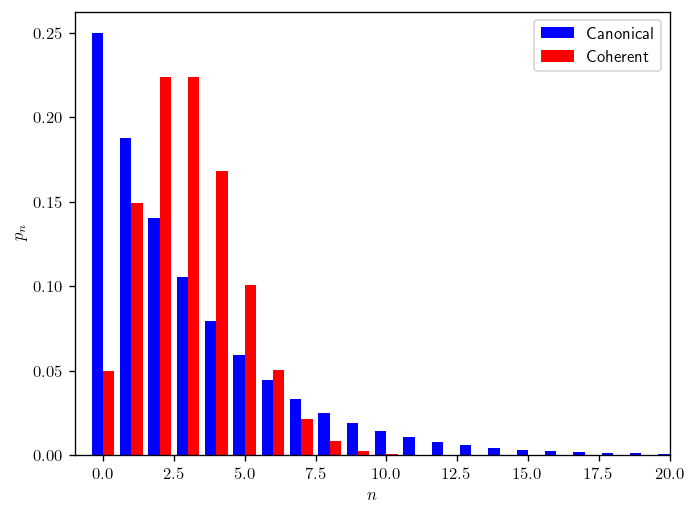

In [ ]:
plt.bar(np.arange(N_MAX + 1) - 0.2, np.diag(rho_K), width=0.4, label="Canonical", color='blue')
plt.bar(np.arange(N_MAX + 1) + 0.2, np.diag(rho_C), width=0.4, label="Coherent", color='red')
plt.xlim(-1, 20)
plt.xlabel("$n$")
plt.ylabel("$p_n$")
plt.legend()
plt.show()

### 4. Free Energy

The free energy is $F = \langle\hat{H}\rangle - TS$. It follows that 
$$\beta F = \frac{\langle\hat{n}\rangle}{c} + \langle\ln\hat{\rho}\rangle = 3\ln\left(\frac{4}{3}\right) + \langle\ln\hat{\rho}\rangle \,.$$

In [ ]:
F_K = 3 * np.log(4 / 3) + np.trace(rho_K @ np.log(rho_K))
F_C = 3 * np.log(4 / 3) + np.trace(rho_C @ np.log(rho_C))
F_K, F_C

(-3501.779556189067, -18.368301518676958)

We see that $F_\text{K} < F_\text{cho}$.